# Menyiapkan data hasil scrapping

In [ ]:
import os
import requests

# URL file CSV
url = "https://raw.githubusercontent.com/arlian/proyek-analisa-sentimen/refs/heads/main/kai_google_play_reviews.csv"

# Nama file lokal
filename = "kai_google_play_reviews.csv"

# Cek apakah file sudah ada
if not os.path.exists(filename):
    print(f"{filename} tidak ada. Mulai mengunduh...")
    response = requests.get(url)
    # Menyimpan konten ke file lokal
    with open(filename, "wb") as file:
        file.write(response.content)
    print("Unduhan selesai.")
else:
    print(f"{filename} sudah ada. Tidak perlu mengunduh.")


kai_google_play_reviews.csv tidak ada. Mulai mengunduh...
Unduhan selesai.


## Load Data Hasil Scraping



In [ ]:
import pandas as pd

data = pd.read_csv('kai_google_play_reviews.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  40655 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          7844 non-null   object
 9   repliedAt             7844 non-null   object
 10  appVersion            40655 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


# Cleaning Data NaN dan Duplicate

In [ ]:
clean_data = data.dropna(subset=["content"])
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  40655 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          7844 non-null   object
 9   repliedAt             7844 non-null   object
 10  appVersion            40655 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


In [ ]:
clean_data = clean_data.drop_duplicates(subset=["content"])
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49630 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              49630 non-null  object
 1   userName              49630 non-null  object
 2   userImage             49630 non-null  object
 3   content               49630 non-null  object
 4   score                 49630 non-null  int64 
 5   thumbsUpCount         49630 non-null  int64 
 6   reviewCreatedVersion  40345 non-null  object
 7   at                    49630 non-null  object
 8   replyContent          7809 non-null   object
 9   repliedAt             7809 non-null   object
 10  appVersion            40345 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.5+ MB


## Install library Sastrawi

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Preprocessing Text

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def clean_text(text: str) -> str:
    """
    Membersihkan teks dengan menghapus mention, hashtag, RT, link, angka, dan karakter non-huruf/angka.
    Juga menghilangkan baris baru dan spasi ekstra.
    """
    # Gabungkan penghapusan mention dan hashtag
    text = re.sub(r'[@#][A-Za-z0-9]+', '', text)
    # Hapus kata 'RT' yang berdiri sendiri
    text = re.sub(r'\bRT\b\s*', '', text)
    # Hapus URL
    text = re.sub(r'http\S+', '', text)
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus karakter non-huruf (tetap mempertahankan spasi)
    text = re.sub(r'[^\w\s]', '', text)
    # Ganti baris baru dengan spasi dan hilangkan spasi ekstra di awal/akhir
    text = text.replace('\n', ' ').strip()
    return text

def casefold_text(text: str) -> str:
    """
    Mengubah semua karakter dalam teks menjadi huruf kecil.
    """
    return text.lower()

def tokenize_text(text: str) -> list:
    """
    Memecah teks menjadi daftar token/kata.
    """
    return word_tokenize(text)

def filter_text(tokens: list) -> list:
    """
    Menghapus stopwords dari daftar token. Menggabungkan stopwords Bahasa Indonesia dan Inggris,
    serta beberapa tambahan kata yang dianggap tidak penting.
    """
    # Gabungkan stopwords dari bahasa Indonesia dan Inggris
    stop_words = set(stopwords.words('indonesian')) | set(stopwords.words('english'))
    extra_stopwords = {'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di',
                       'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'}
    stop_words.update(extra_stopwords)

    # Filter token
    return [token for token in tokens if token not in stop_words]

def stem_text(text: str) -> str:
    """
    Melakukan stemming pada teks menggunakan Sastrawi Stemmer.
    Teks diharapkan dalam format string yang sudah terpisah dengan spasi.
    """
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Jika belum di-tokenize, lakukan split sederhana
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def to_sentence(words: list) -> str:
    """
    Mengubah daftar kata menjadi kalimat.
    """
    return ' '.join(words)


# List Slang Words

In [ ]:
slangwords = {
    "@": "di",
    "abis": "habis",
    "wtb": "beli",
    "wts": "jual",
    "wtt": "tukar",
    "masi": "masih",
    "bgt": "banget",
    "maks": "maksimal",
    "gmn": "bagaimana",
    "krn": "karena",
    "lg": "lagi",
    "tdk": "tidak",
    "gk": "tidak",
    "cmn": "cuma",
    "dr": "dari",
    "aja": "saja",
    "dpt": "dapat",
    "skrg": "sekarang",
    "klo": "kalau",
    "dg": "dengan",
    "sy": "saya",
    "mw": "mau",
    "bnr": "benar",
    "tq": "makasih",
    "pls": "tolong",
    "plz": "tolong",
    "gpp": "aman",
    "nggak": "tidak",
    "yuk": "ayo",
    "sbg": "sebagai",
    "smoga": "semoga",
    "sdh": "sudah",
    "tp": "tapi",
    "dlm": "dalam",
    "yg": "yang",
    "tuh": "itu",
    "drpd": "daripada",
    "bkn": "bukan",
    "kalo": "kalau",
    "wkwk": "tertawa",
    "lol": "tertawa",
    "u": "anda",
    "ur": "kamu",
    "k": "oke",
    "ok": "oke",
    "anjir": "wah",
    "keren": "hebat",
    "kece": "hebat",
    "lebay": "berlebihan",
    "mager": "malas",
    "males": "malas",
    "cobain": "coba",
    "cepet": "cepat",
    "cepet2": "cepat",
    "lemot": "lambat",
    "sumpah": "serius",
    "woles": "santai",
    "cuy": "teman",
    "capek": "lelah",
    "ngeselin": "kesal",
    "ngomongin": "bicarakan",
    "ngebug": "bug",
    "ngadat": "error",
    "lag": "lambat",
    "crash": "henti",
    "gaje": "aneh",
    "bete": "kesal",
    "mantul": "mantap",
    "mantep": "mantap",
    "gituan": "demikian",
    "antri": "antre",
    "ngebatalin": "batal",
    "ngebatal": "batal",
    "ngechat": "chat",
    "ngecek": "cek",
    "ngebosenin": "bosan",
    "bgt2": "sangat",
    "bgtan": "sangat",
    "bgst": "buruk",
    "ngaco": "absur",
    "ngasal": "asal",
    "ngebingungin": "bingung",
    "ngehang": "hang",
    "nghang": "hang",
    "ngefreeze": "beku",
    "ngelag": "lag",
    "fix": "perbaikan",
    "nantiin": "tunda",
    "jm": "jam",
    "gitu": "demikian",
    "lambat" : "lemot"
}

def fix_slangwords(text: str) -> str:
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)


# Apply Function

setelah semua function dibuat, langkah selanjutnya ada menerapkannya untuk mendapatkan text final yang bersih

In [ ]:
clean_data = (
    clean_data.assign(text_clean=lambda df: df['content'].apply(clean_text))
              .assign(text_casefold=lambda df: df['text_clean'].apply(casefold_text))
              .assign(text_slang=lambda df: df['text_casefold'].apply(fix_slangwords))
              .assign(text_tokenized=lambda df: df['text_slang'].apply(tokenize_text))
              .assign(text_stopwords=lambda df: df['text_tokenized'].apply(filter_text))
              .assign(text_final=lambda df: df['text_stopwords'].apply(to_sentence))
)

In [ ]:
clean_data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefold,text_slang,text_tokenized,text_stopwords,text_final
0,a105e9e0-a60b-4078-b9be-15bce3ea609a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi KAI Acces sebelumnya lebih simple dan...,1,2234,6.4.1,2024-04-24 23:29:53,NaN,NaN,6.4.1,Aplikasi KAI Acces sebelumnya lebih simple dan...,aplikasi kai acces sebelumnya lebih simple dan...,aplikasi kai acces sebelumnya lebih simple dan...,"[aplikasi, kai, acces, sebelumnya, lebih, simp...","[aplikasi, kai, acces, simple, langsung, lanca...",aplikasi kai acces simple langsung lancar sesu...
1,42cbbf92-969d-4633-828a-3657646dff81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana mau pesan tiket susah bgt... OTP ma...,1,140,6.9.11,2025-01-14 07:55:22,NaN,NaN,6.9.11,Ini gimana mau pesan tiket susah bgt OTP masuk...,ini gimana mau pesan tiket susah bgt otp masuk...,ini gimana mau pesan tiket susah banget otp ma...,"[ini, gimana, mau, pesan, tiket, susah, banget...","[gimana, pesan, tiket, susah, banget, otp, mas...",gimana pesan tiket susah banget otp masuknya m...
2,a7fee65d-bb92-4647-9301-c60fab30d839,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sudah bagus, hanya saran diberikan in...",4,13,6.9.11,2025-01-12 09:16:15,NaN,NaN,6.9.11,Aplikasi sudah bagus hanya saran diberikan inf...,aplikasi sudah bagus hanya saran diberikan inf...,aplikasi sudah bagus hanya saran diberikan inf...,"[aplikasi, sudah, bagus, hanya, saran, diberik...","[aplikasi, bagus, saran, info, comuter, line, ...",aplikasi bagus saran info comuter line dijadwa...
3,583f4247-c6d9-402c-9f77-5fcce540051b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sebelumnya sudah instal aplikasi nya dan bisa ...,2,45,6.9.13,2025-02-07 17:35:16,NaN,NaN,6.9.13,Sebelumnya sudah instal aplikasi nya dan bisa ...,sebelumnya sudah instal aplikasi nya dan bisa ...,sebelumnya sudah instal aplikasi nya dan bisa ...,"[sebelumnya, sudah, instal, aplikasi, nya, dan...","[instal, aplikasi, digunakantidak, uninstal, l...",instal aplikasi digunakantidak uninstal logout...
4,867c8bcb-3ea7-45cb-80e2-5db9dc407451,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"software developer nya jelek bgt, suka error t...",1,31,6.9.11,2025-01-12 02:30:23,NaN,NaN,6.9.11,software developer nya jelek bgt suka error ti...,software developer nya jelek bgt suka error ti...,software developer nya jelek banget suka error...,"[software, developer, nya, jelek, banget, suka...","[software, developer, jelek, banget, suka, err...",software developer jelek banget suka error mas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,d2c292df-4e81-45df-9a72-fec66626dddf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Log in aja susah asuu,1,0,1.6.1.2,2019-09-21 04:10:57,halo kak Aris. susah loginnya bagaimana kak? a...,2019-09-21 04:15:53,1.6.1.2,Log in aja susah asuu,log in aja susah asuu,log in saja susah asuu,"[log, in, saja, susah, asuu]","[log, susah, asuu]",log susah asuu
49996,5ff6dddb-3258-4b65-979b-bd6515363ad2,Faishol Ashari,https://play-lh.googleusercontent.com/a-/ALV-U...,pakai KAI access sangat membantu,4,0,5.0.1,2022-07-21 22:06:24,"Hi Kak, Terima kasih untuk rating yang telah k...",2022-07-22 08:11:18,5.0.1,pakai KAI access sangat membantu,pakai kai access sangat membantu,pakai kai access sangat membantu,"[pakai, kai, access, sangat, membantu]","[pakai, kai, access, membantu]",pakai kai access membantu
49997,2a0620cf-2eb0-43ee-8acb-4f4c431c7111,sep riadi,https://play-lh.googleusercontent.com/a/ACg8oc...,Bayar pake vurtualacun kada bisa kadang engga,1,0,5.1.0,2023-04-04 00:24:30,NaN,NaN,5.1.0,Bayar pake vurtualacun kada bisa kadang engga,bayar pake vurtualacun kada bisa kadang engga,bayar pake vurtualacun kada bisa kadang engga,"[bayar, pake, vurtualacun, kada, bisa, kadang,

# Labeling

In [ ]:
import csv
import requests
from io import StringIO

def load_lexicon(url: str) -> dict:
    response = requests.get(url)
    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        return {row[0]: int(row[1]) for row in reader}
    else:
        print(f"Failed to fetch lexicon data from {url}")
        return {}

lexicon_positive = load_lexicon("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv")
lexicon_negative = load_lexicon("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")


In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        score += lexicon_positive.get(word, 0)
        score += lexicon_negative.get(word, 0)

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
sentiment_results = clean_data['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
scores, polarities = zip(*sentiment_results)
clean_data['polarity_score'] = scores
clean_data['polarity'] = polarities
print(clean_data['polarity'].value_counts())

polarity
negative    32644
positive    11416
neutral      5570
Name: count, dtype: int64


# Visualisasi dan Pemahaman Data

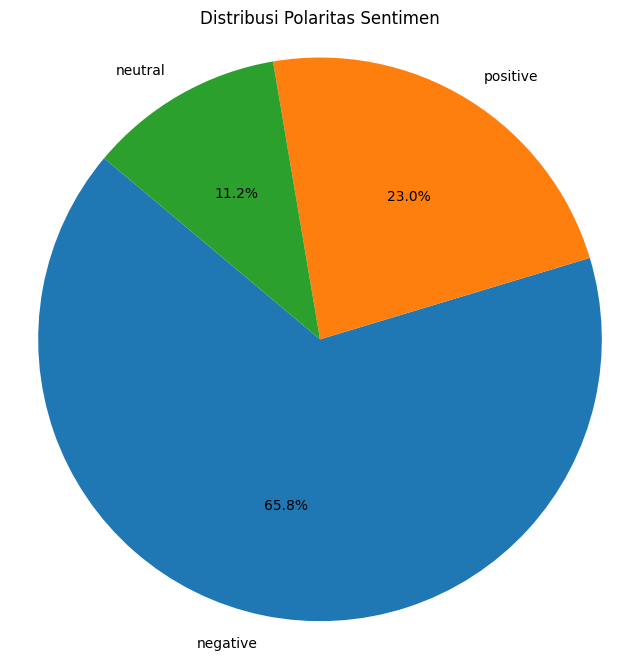

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing label polaritas
polarity_counts = clean_data['polarity'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Polaritas Sentimen')
plt.axis('equal')
plt.show()

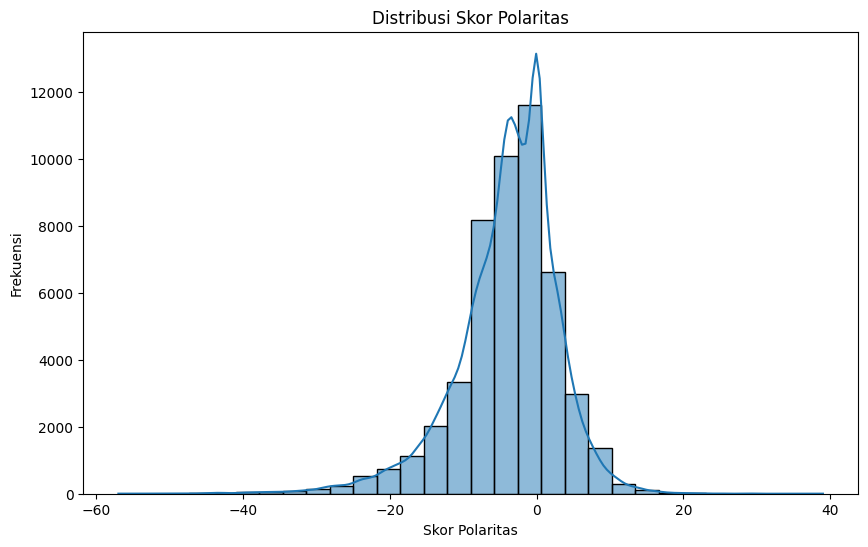

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(clean_data['polarity_score'], bins=30, kde=True)
plt.title('Distribusi Skor Polaritas')
plt.xlabel('Skor Polaritas')
plt.ylabel('Frekuensi')
plt.show()


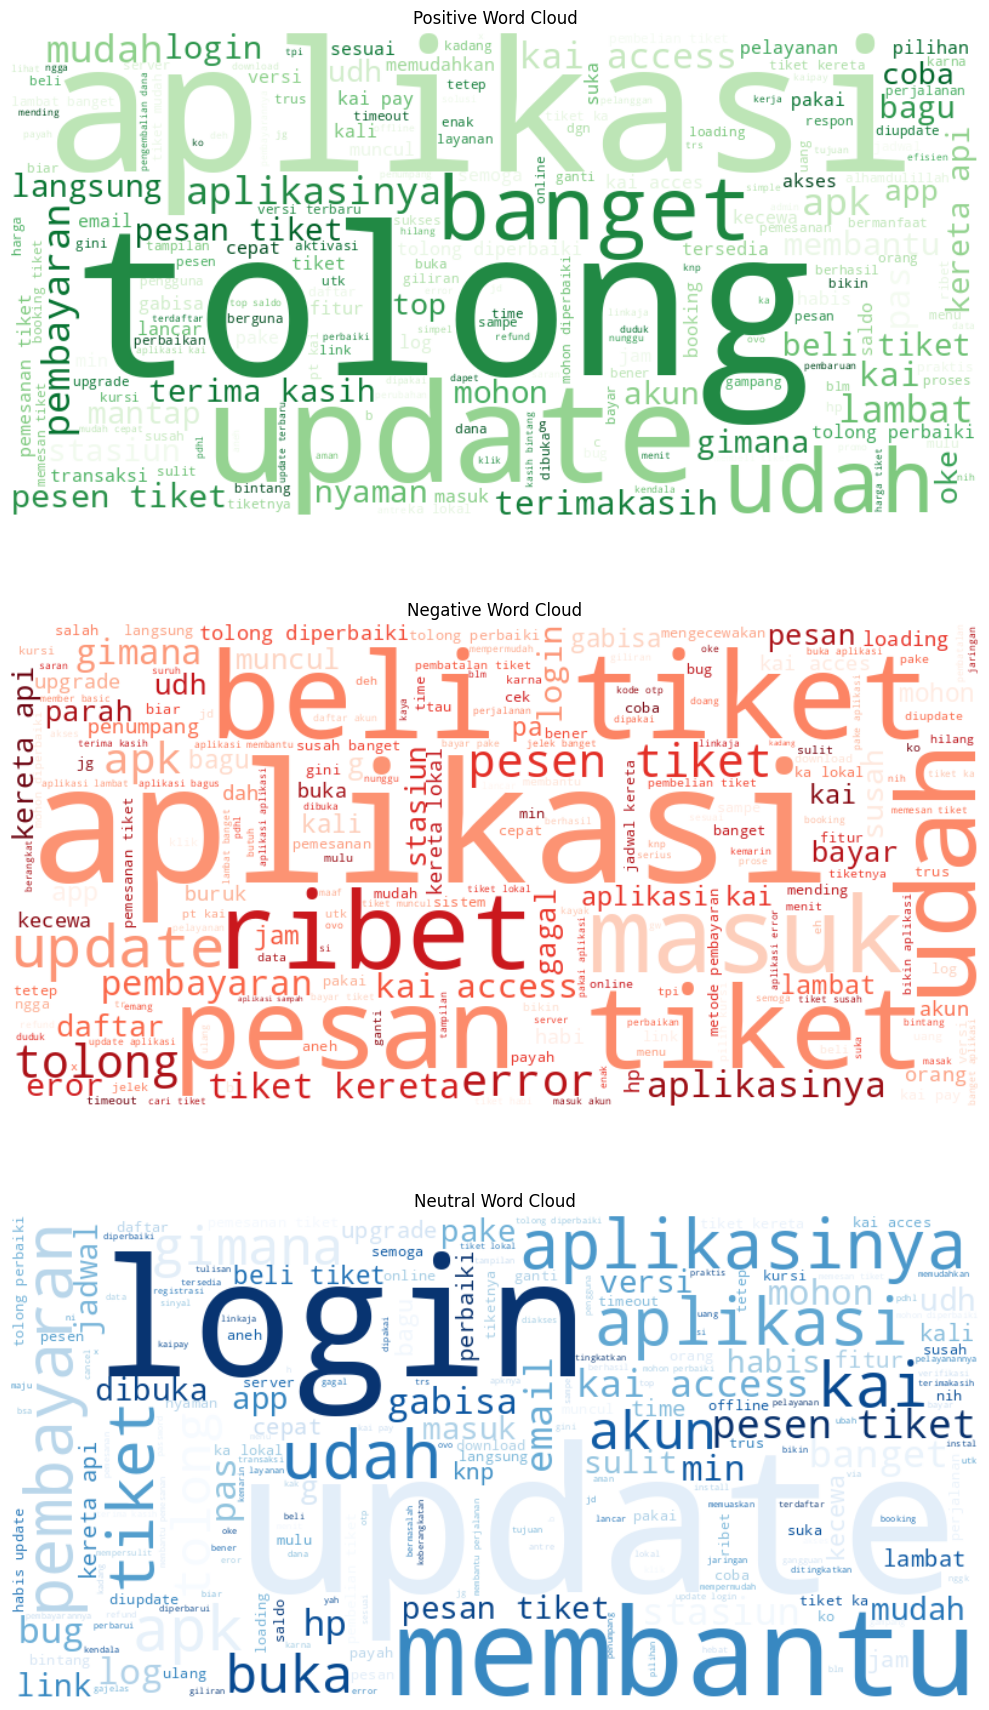

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(clean_data[clean_data['polarity'] == 'positive']['text_final'].astype(str))
negative_text = ' '.join(clean_data[clean_data['polarity'] == 'negative']['text_final'].astype(str))
neutral_text  = ' '.join(clean_data[clean_data['polarity'] == 'neutral']['text_final'].astype(str))

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
wordcloud_neutral  = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

fig, axs = plt.subplots(3, 1, figsize=(10, 18))

axs[0].imshow(wordcloud_positive, interpolation='bilinear')
axs[0].set_title("Positive Word Cloud")
axs[0].axis('off')

axs[1].imshow(wordcloud_negative, interpolation='bilinear')
axs[1].set_title("Negative Word Cloud")
axs[1].axis('off')

axs[2].imshow(wordcloud_neutral, interpolation='bilinear')
axs[2].set_title("Neutral Word Cloud")
axs[2].axis('off')

plt.tight_layout()
plt.show()


# Pembuatan Model



*   CNN 70/15/15
*   GRU 70/15/15

*   Bidirectional LSTM 70/15/15






In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Conv1D, GlobalMaxPooling1D, SpatialDropout1D,
                                     Dense, Dropout, Bidirectional, GRU, LSTM)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Ekstrak teks dan label
texts = clean_data['text_final'].astype(str).tolist()
labels = clean_data['polarity'].tolist()

# Tokenisasi teks dengan token untuk out-of-vocabulary (OOV)
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
max_features = len(tokenizer.word_index) + 1  # Total ukuran kosakata
max_len = 100  # Panjang sequence maksimum

# Ubah teks menjadi sequence dan lakukan padding
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Encode label dan konversi ke one-hot vectors
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
num_classes = len(le.classes_)
y = to_categorical(labels_encoded, num_classes=num_classes)

# ---------------------------
# Membagi Data: Train (70%), Validation (15%), dan Test (15%)
# ---------------------------
# Pisahkan test set (15% dari total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=labels
)

# Pisahkan data yang tersisa menjadi train dan validation.
# Agar validation menjadi 15% dari total, gunakan rasio 15/85 ≈ 0.1765
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=np.argmax(y_temp, axis=1)
)

print("Jumlah Data:")
print("Train:", X_train.shape[0])
print("Validation:", X_val.shape[0])
print("Test:", X_test.shape[0])

# Callback Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


Jumlah Data:
Train: 34739
Validation: 7446
Test: 7445


In [ ]:
def train_and_evaluate(model, model_name, epochs=20, batch_size=1028):
    print(f"\n--- Training {model_name} Model ---")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {test_score[1]*100:.2f}%")
    return history, test_score

In [ ]:
# --- Model CNN ---
model_CNN = Sequential([
    Embedding(input_dim=max_features, output_dim=512, input_length=max_len),
    Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model_CNN.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history_CNN, score_CNN = train_and_evaluate(model_CNN, "CNN")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



--- Training CNN Model ---
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.5883 - loss: 1.0136 - val_accuracy: 0.7369 - val_loss: 0.7187
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7680 - loss: 0.6500 - val_accuracy: 0.8734 - val_loss: 0.4501
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8797 - loss: 0.4482 - val_accuracy: 0.8981 - val_loss: 0.3622
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9094 - loss: 0.3554 - val_accuracy: 0.8979 - val_loss: 0.3294
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9212 - loss: 0.2859 - val_accuracy: 0.8961 - val_loss: 0.3200
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9301 - loss: 0.2466 - val_accuracy: 0.8930 - val_loss: 0.3226
CNN Test Accuracy: 89.34%


In [ ]:
# --- Model GRU ---
model_GRU = Sequential([
    Embedding(input_dim=max_features, output_dim=512, input_length=max_len),
    SpatialDropout1D(0.3),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(128)),  # return_sequences default False
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model_GRU.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

print("\n--- GRU Model Summary ---")
model_GRU.summary()

# Training dan Evaluasi Model GRU
history_GRU, score_GRU = train_and_evaluate(model_GRU, "GRU")



--- GRU Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training GRU Model ---
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.6232 - loss: 3.0957 - val_accuracy: 0.7827 - val_loss: 1.8317
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.7940 - loss: 1.5871 - val_accuracy: 0.8746 - val_loss: 0.9379
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.9054 - loss: 0.7766 - val_accuracy: 0.9108 - val_loss: 0.5387
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9429 - loss: 0.4237 - val_accuracy: 0.9177 - val_loss: 0.3900
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9595 - loss: 0.2582 - val_accuracy: 0.9222 - val_loss: 0.3247
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.9653 - loss: 0.1858 - val_accuracy: 0.9217 - val_loss: 0.2909
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 0.9713 - loss: 0.1465 - val_accuracy: 0.9228 - val_loss: 0.2974
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.9779

In [ ]:
# --- Model Bidirectional LSTM ---
model_BiLSTM = Sequential([
    Embedding(input_dim=max_features, output_dim=512, input_length=max_len),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(128)),  # return_sequences default False
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model_BiLSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

print("\n--- Bidirectional LSTM Model Summary ---")
model_BiLSTM.summary()

# Training dan Evaluasi Model Bidirectional LSTM
history_BiLSTM, score_BiLSTM = train_and_evaluate(model_BiLSTM, "Bidirectional LSTM")



--- Bidirectional LSTM Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training Bidirectional LSTM Model ---
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.5814 - loss: 3.1198 - val_accuracy: 0.6988 - val_loss: 1.9325
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.7351 - loss: 1.6848 - val_accuracy: 0.8356 - val_loss: 0.9917
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - accuracy: 0.8678 - loss: 0.8319 - val_accuracy: 0.9021 - val_loss: 0.5560
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.9414 - loss: 0.4286 - val_accuracy: 0.9181 - val_loss: 0.3881
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.9601 - loss: 0.2593 - val_accuracy: 0.9234 - val_loss: 0.3248
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.9707 - loss: 0.1731 - val_accuracy: 0.9224 - val_loss: 0.3049
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.9742 - loss: 0.1361 - val_accuracy: 0.9163 - val_loss: 0.2868
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accu

# Evaluasi Hasil

In [ ]:
import pandas as pd
from IPython.display import HTML, display

cnn_train_acc = history_CNN.history['accuracy'][-1] * 100
cnn_val_acc   = history_CNN.history['val_accuracy'][-1] * 100
cnn_test_acc  = score_CNN[1] * 100

gru_train_acc = history_GRU.history['accuracy'][-1] * 100
gru_val_acc   = history_GRU.history['val_accuracy'][-1] * 100
gru_test_acc  = score_GRU[1] * 100

bilstm_train_acc = history_BiLSTM.history['accuracy'][-1] * 100
bilstm_val_acc   = history_BiLSTM.history['val_accuracy'][-1] * 100
bilstm_test_acc  = score_BiLSTM[1] * 100

data = {
    'Model': ['CNN', 'GRU', 'BiLSTM'],
    'Train Accuracy (%)': [cnn_train_acc, gru_train_acc, bilstm_train_acc],
    'Validation Accuracy (%)': [cnn_val_acc, gru_val_acc, bilstm_val_acc],
    'Test Accuracy (%)': [cnn_test_acc, gru_test_acc, bilstm_test_acc]
}

df = pd.DataFrame(data)

html_table = df.to_html(index=False, float_format="{:.2f}".format)
display(HTML(html_table))


Model,Train Accuracy (%),Validation Accuracy (%),Test Accuracy (%)
CNN,92.94,89.30,89.34
GRU,98.40,92.29,92.60
BiLSTM,97.93,92.01,92.46


# Melakukan Prediksi

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import display, HTML

def predict_sentiment(text, model):

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    pred_prob = model.predict(padded_sequence)
    pred_index = np.argmax(pred_prob, axis=1)

    pred_label = le.inverse_transform(pred_index)
    return pred_label[0], pred_prob

# Contoh teks untuk masing-masing kategori sentimen
sample_texts = {
    "Positive": "pesan tiket jadi lebih mudah dan cepat",
    "Negative": "aplikasinya lemot, banyak bug",
    "Neutral": "biasa aja"
}

# Lakukan prediksi menggunakan masing-masing model untuk setiap contoh teks
results = []  # Untuk menyimpan hasil dalam bentuk list agar bisa divisualisasikan dalam tabel

for sentiment, text in sample_texts.items():
    result = {"Input": text, "Expected": sentiment}

    label_cnn, prob_cnn = predict_sentiment(text, model_CNN)
    label_gru, prob_gru = predict_sentiment(text, model_GRU)
    label_bilstm, prob_bilstm = predict_sentiment(text, model_BiLSTM)

    result["Model_CNN"] = label_cnn
    result["Model_GRU"] = label_gru
    result["Model_BiLSTM"] = label_bilstm
    results.append(result)

    print(f"Input ({sentiment}): {text}")
    print("Prediksi Model_CNN :", label_cnn)
    print("Prediksi Model_GRU :", label_gru)
    print("Prediksi Model_BiLSTM :", label_bilstm)
    print("-" * 50)

# Visualisasikan hasil prediksi dalam bentuk tabel
df_results = pd.DataFrame(results)
# Menampilkan tabel tanpa index
html_table = df_results.to_html(index=False)
display(HTML(html_table))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Input (Positive): pesan tiket jadi lebih mudah dan cepat
Prediksi Model_CNN : positive
Prediksi Model_GRU : positive
Prediksi Model_BiLSTM : positive
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Input (Negative): aplikasinya lemot, banyak bug
Prediksi Model_CNN : negative
Prediksi Model_GRU : negative
Prediksi Model_BiLSTM : negative
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Input (Neutral): biasa aja
Prediksi Model_CNN : neutral
Prediksi Model_GRU : neutral
Prediksi Model_BiLSTM : neutral
--------------------------------------------------


Input,Expected,Model_CNN,Model_GRU,Model_BiLSTM
pesan tiket jadi lebih mudah dan cepat,Positive,positive,positive,positive
"aplikasinya lemot, banyak bug",Negative,negative,negative,negative
biasa aja,Neutral,neutral,neutral,neutral
